In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(style="darkgrid")
%matplotlib inline

In [65]:
df_o = pd.read_excel('./online_retail_data.xlsx')
df_o.shape

(541909, 8)

In [66]:
df = df_o.copy(deep=True)

In [67]:
df.head().T

,0,1,2,3,4
InvoiceNo,536365,536365,536365,536365,536365
StockCode,85123A,71053,84406B,84029G,84029E
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
Quantity,6,6,8,6,6
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00
UnitPrice,2.55,3.39,2.75,3.39,3.39
CustomerID,17850,17850,17850,17850,17850
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


In [68]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [70]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [71]:
len(df['StockCode'].value_counts())

4070

In [72]:
df['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
72781        1
82545A       1
72759        1
82615        1
85060        1
Name: StockCode, Length: 4070, dtype: int64

In [126]:
df_temp = df.groupby(['InvoiceNo', 'StockCode'])
df_temp.first()

Description  Quantity  \
InvoiceNo StockCode                                                  
536365    21730        GLASS STAR FROSTED T-LIGHT HOLDER         6   
          22752             SET 7 BABUSHKA NESTING BOXES         2   
          71053                      WHITE METAL LANTERN         6   
          84029E          RED WOOLLY HOTTIE WHITE HEART.         6   
          84029G     KNITTED UNION FLAG HOT WATER BOTTLE         6   
...                                                  ...       ...   
C581490   23144          ZINC T-LIGHT HOLDER STARS SMALL       -11   
C581499   M                                       Manual        -1   
C581568   21258               VICTORIAN SEWING BOX LARGE        -5   
C581569   20979            36 PENCILS TUBE RED RETROSPOT        -5   
          84978         HANGING HEART JAR T-LIGHT HOLDER        -1   

                            InvoiceDate  UnitPrice  CustomerID  \
InvoiceNo StockCode                                              
536365    21730     2010-12-01 08:26:00       4.25     17850.0   
          22752     2010-12-01 08:26:00       7.65     17850.0   
          71053     2010-12-01 08:26:00       3.39     17850.0   
          84029E    2010-12-01 08:26:00       3.39     17850.0   
          84029G    2010-12-01 08:26:00       3.39     17850.0   
...                                 ...        ...         ...   
C581490   23144     2011-12-09 09:57:00       0.83     14397.0   
C581499   M         2011-12-09 10:28:00     224.69     15498.0   
C581568   21258     2011-12-09 11:57:00      10.95     15311.0   
C581569   20979     2011-12-09 11:58:00       1.25     17315.0   
          84978     2011-12-09 11:58:00       1.25     17315.0   

                            Country  Hour  Month Day of Week  Year  Date  \
InvoiceNo StockCode                                                        
536365    21730      United Kingdom     8     12         Tue  2010     1   
          22752      United Kingdom     8     12         Tue  2010     1   
          71053      United Kingdom     8     12         Tue  2010     1   
          84029E     United Kingdom     8     12         Tue  2010     1   
          84029G     United Kingdom     8     12         Tue  2010     1   
...                             ...   ...    ...         ...   ...   ...   
C581490   23144      United Kingdom     9     12         Thu  2011     9   
C581499   M          United Kingdom    10     12         Thu  2011     9   
C581568   21258      United Kingdom    11     12         Thu  2011     9   
C581569   20979      United Kingdom    11     12         Thu  2011     9   
          84978      United Kingdom    11     12         Thu  2011     9   

                    Day/Night  
InvoiceNo StockCode            
536365    21730           Day  
          22752           Day  
          71053           Day  
          84029E          Day  
          84029G          Day  
...                       ...  
C581490   23144           Day  
C581499   M               Day  
C581568   21258           Day  
C581569   20979           Day  
          84978           Day  

[531225 rows x 12 columns]

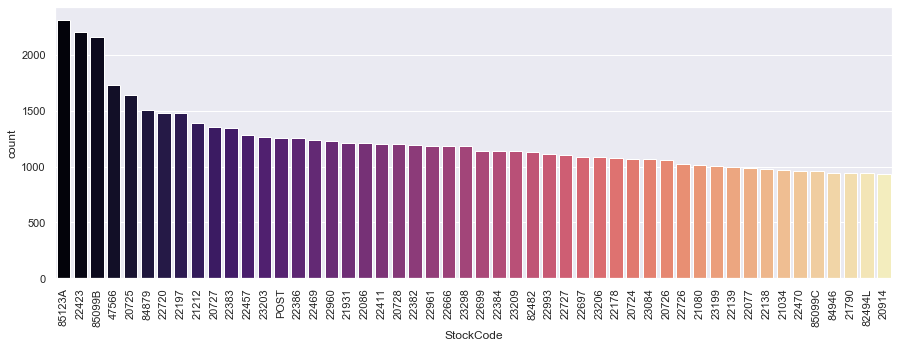

In [121]:
plt.figure(figsize=(15,5))
sns.countplot(x = df['StockCode'], data = df, order = df['StockCode'].value_counts().iloc[:50].index, palette='magma')
plt.xticks(rotation=90)
plt.show()

In [127]:
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

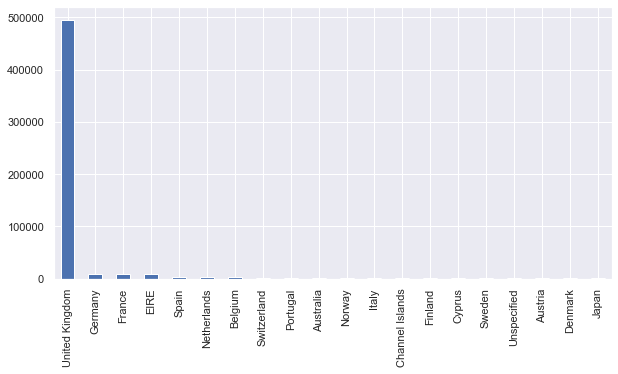

In [129]:
plt.figure(figsize=(10, 5))
df.Country.value_counts()[:20].plot(kind='bar')

In [78]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")

df['Hour'] = df['InvoiceDate'].apply(lambda time: time.hour)
df['Month'] = df['InvoiceDate'].apply(lambda time: time.month)
df['Day of Week'] = df['InvoiceDate'].apply(lambda time: time.dayofweek)
df['Year'] = df['InvoiceDate'].apply(lambda time: time.year)
df['Date'] = df['InvoiceDate'].apply(lambda time: time.day)

dmap = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
df['Day of Week'] = df['Day of Week'].map(dmap)


df["Day/Night"] = df["InvoiceDate"].apply(lambda x : "Night" if int(x.strftime("%H")) > 18 else "Day")

In [134]:
df.head(3).T

,0,1,2
InvoiceNo,536365,536365,536365
StockCode,85123A,71053,84406B
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER
Quantity,6,6,8
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00
UnitPrice,2.55,3.39,2.75
CustomerID,17850,17850,17850
Country,United Kingdom,United Kingdom,United Kingdom
Hour,8,8,8
Month,12,12,12


Day      537333
Night      4576
Name: Day/Night, dtype: int64

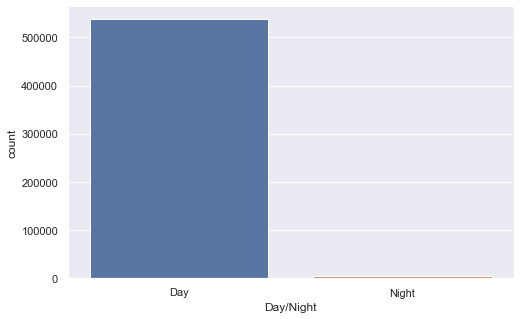

In [140]:
plt.figure(figsize=(8,5))
sns.countplot(x='Day/Night',data=df)
df['Day/Night'].value_counts()

Text(0.5, 1.0, 'People goes for shopping on each days of the week')

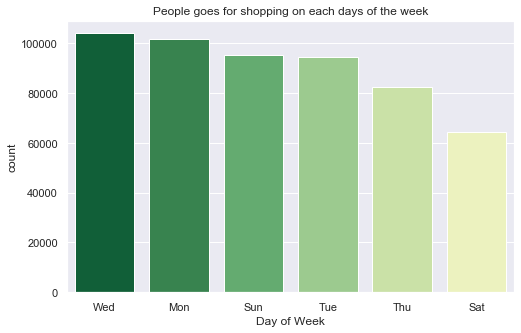

In [81]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Day of Week', data = df, order = df['Day of Week'].value_counts().index, palette='YlGn_r')
plt.title("People goes for shopping on each days of the week")

Text(0.5, 1.0, 'People goes for shopping during each Month')

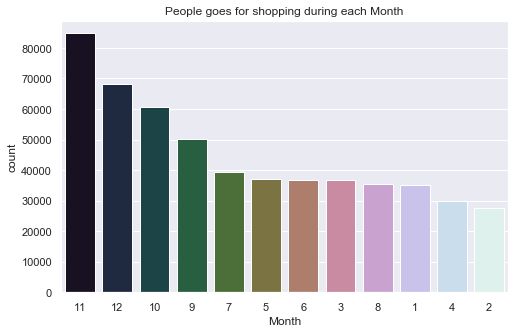

In [114]:
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=df, order = df['Month'].value_counts().index, palette='cubehelix')
plt.title("People goes for shopping during each Month")

Text(0.5, 1.0, 'Shopping trends on yearly basis')

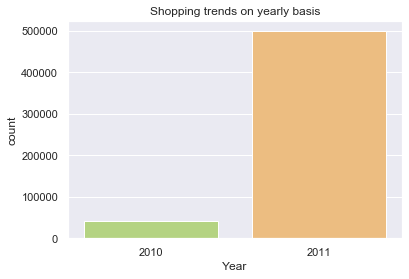

In [83]:
sns.countplot(x= "Year", data= df, palette='RdYlGn_r')
plt.title("Shopping trends on yearly basis")

In [99]:
print('% of 2010 data: ',round(df['Year'].value_counts()[2010]/ len(df['Year']), 2) * 100)
print('% of 2011 data: ',round(df['Year'].value_counts()[2011]/ len(df['Year']), 2) * 100)

% of 2010 data:  8.0
% of 2011 data:  92.0


`NOTE`: This yearly trend doesn't makes any sense due to lack of data for the year 2010. There are only **7.8%** of 2010 data as compared to **92.1%** of 2011 data. 

In [84]:
total_spend = df.groupby(by='CustomerID', as_index=False)['UnitPrice'].sum()
total_spend.columns = ['CustomerID', 'total_spent']

In [112]:
print('Total Unique Customers: ', df['CustomerID'].nunique())

Total Unique Customers:  4372


In [146]:
#how many orders have they made
invoice_ct = df.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
invoice_ct.columns = ['CustomerID', 'Number_of_Orders']
invoice_ct.head().T

,0,1,2,3,4
CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0
Number_of_Orders,2.0,182.0,31.0,73.0,17.0


In [147]:
#how many items they bought
total_items = df.groupby(by='CustomerID', as_index=False)['Quantity'].sum()
total_items.columns = ['CustomerID', 'Number_of_Items']
total_items.head().T

,0,1,2,3,4
CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0
Number_of_Items,0.0,2458.0,2341.0,631.0,197.0


In [148]:
#when was their first order and how long ago was that from the last date in file
earliest_order = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].min()
earliest_order.columns = ['CustomerID', 'First_Invoice']
earliest_order['now'] = pd.to_datetime((df['InvoiceDate']).max())
earliest_order['Days_As_Customer'] = 1 + (earliest_order.now-earliest_order.First_Invoice).astype('timedelta64[D]')
earliest_order.drop('now', axis=1, inplace=True)
earliest_order.head().T

,0,1,2,3,4
CustomerID,12346,12347,12348,12349,12350
First_Invoice,2011-01-18 10:01:00,2010-12-07 14:57:00,2010-12-16 19:09:00,2011-11-21 09:51:00,2011-02-02 16:01:00
Days_As_Customer,326,367,358,19,310


In [150]:
#when was their last order and how long ago was that from the last date in file
last_order = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
last_order.columns = ['CustomerID', 'Last_Purchase']
last_order['now'] = pd.to_datetime((df['InvoiceDate']).max())
last_order['Days_Since_Purchase'] = 1 + (last_order.now-last_order.Last_Purchase).astype('timedelta64[D]')
last_order.drop('now', axis=1, inplace=True)
last_order.head().T

,0,1,2,3,4
CustomerID,12346,12347,12348,12349,12350
Last_Purchase,2011-01-18 10:17:00,2011-12-07 15:52:00,2011-09-25 13:13:00,2011-11-21 09:51:00,2011-02-02 16:01:00
Days_Since_Purchase,326,2,75,19,310


In [151]:
#combine all the dataframes into one
import functools
dfs = [total_spend,invoice_ct,earliest_order,last_order,total_items]
CustomerTable = functools.reduce(lambda left, right: pd.merge(left, right, on='CustomerID', how='outer'), dfs)
CustomerTable.head()

,CustomerID,total_spent,Number_of_Orders,First_Invoice,Days_As_Customer,Last_Purchase,Days_Since_Purchase,Number_of_Items
0,12346.0,2.08,2,2011-01-18 10:01:00,326.0,2011-01-18 10:17:00,326.0,0
1,12347.0,481.21,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458
2,12348.0,178.71,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341
3,12349.0,605.10,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631
4,12350.0,65.30,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197


In [152]:
#how many customers?
len(CustomerTable)

4372

In [154]:
#identify and separate big spenders, lots of orders, long-time customers, dormant customers for
#sales and marketing campaign use; need to be separate flags because they aren't all mutually
#exclusive

def big_spender(row):
    if row['total_spent'] >= 1661.64:
        return 'Yes'
    else:
        return 'No'

def many_orders(row):
    if row['Number_of_Orders'] >= 100:
        return 'Yes'
    else:
        return 'No'

def loyal_customer(row):
    if row['Days_As_Customer'] >= 326:
        return 'Yes' 
    else:
        return 'No'

def dormant_customer(row):
    if row['Days_Since_Purchase'] >= 141:
        return 'Yes' 
    else:
        return 'No'

CustomerTable['BigSpender'] = CustomerTable.apply(big_spender, axis=1)
CustomerTable['ManyOrders'] = CustomerTable.apply(many_orders, axis=1)
CustomerTable['LoyalCustomer'] = CustomerTable.apply(loyal_customer, axis=1)
CustomerTable['DormantCustomer'] = CustomerTable.apply(dormant_customer, axis=1)

CustomerTable['OrderFrequency'] = CustomerTable['Number_of_Orders']/CustomerTable['Days_As_Customer']

CustomerTable.head(10)

,CustomerID,total_spent,Number_of_Orders,First_Invoice,Days_As_Customer,Last_Purchase,Days_Since_Purchase,Number_of_Items,BigSpender,ManyOrders,LoyalCustomer,DormantCustomer,OrderFrequency
0,12346.0,2.08,2,2011-01-18 10:01:00,326.0,2011-01-18 10:17:00,326.0,0,No,No,Yes,Yes,0.006135
1,12347.0,481.21,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458,No,Yes,Yes,No,0.495913
2,12348.0,178.71,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341,No,No,Yes,No,0.086592
3,12349.0,605.10,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631,No,No,No,No,3.842105
4,12350.0,65.30,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197,No,No,No,Yes,0.054839
5,12352.0,2211.10,95,2011-02-16 12:33:00,297.0,2011-11-03 14:37:00,36.0,470,Yes,No,No,No,0.319865
6,12353.0,24.30,4,2011-05-19 17:47:00,204.0,2011-05-19 17:47:00,204.0,20,No,No,No,Yes,0.019608
7,12354.0,261.22,58,2011-04-21 13:11:00,232.0,2011-04-21 13:11:00,232.0,530,No,No,No,Yes,0.250000
8,12355.0,54.65,13,2011-05-09 13:49:00,214.0,2011-05-09 13:49:00,214.0,240,No,No,No,Yes,0.060748
9,12356.0,188.87,59,2011-01-18 09:50:00,326.0,2011-11-17 08:40:00,23.0,1591,No,No,Yes,No,0.180982


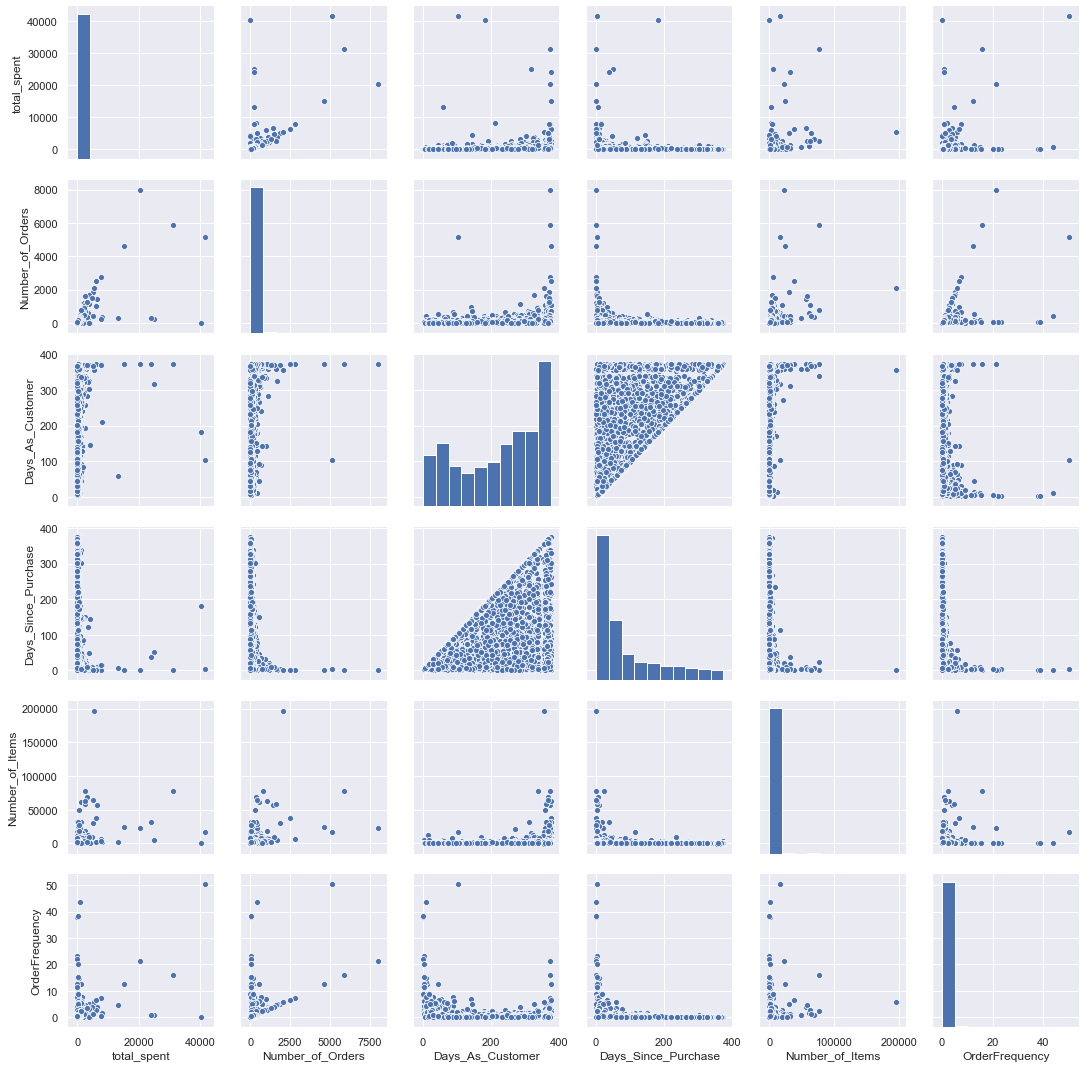

In [156]:
sns.pairplot(CustomerTable, vars=['total_spent', 'Number_of_Orders', 'Days_As_Customer', 'Days_Since_Purchase','Number_of_Items', 'OrderFrequency'])